## DNN Example for Fashion MNIST Dataset

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

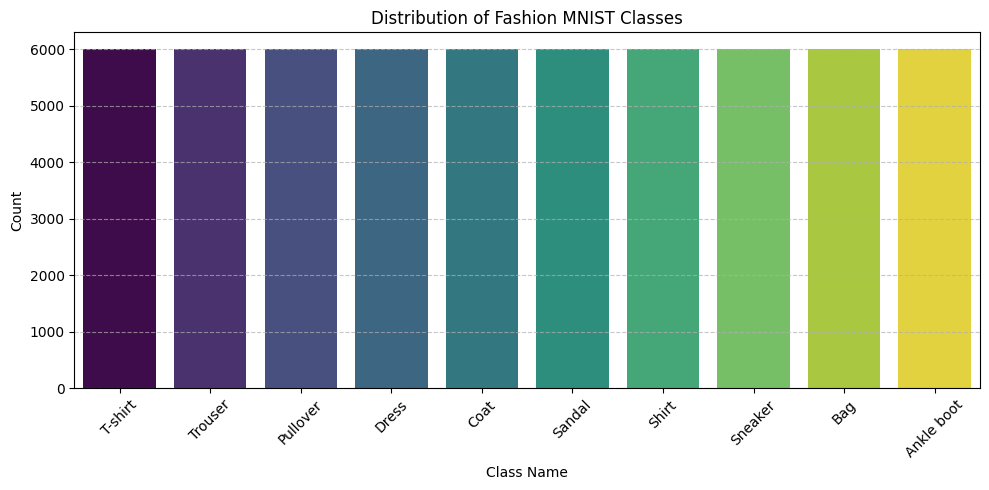

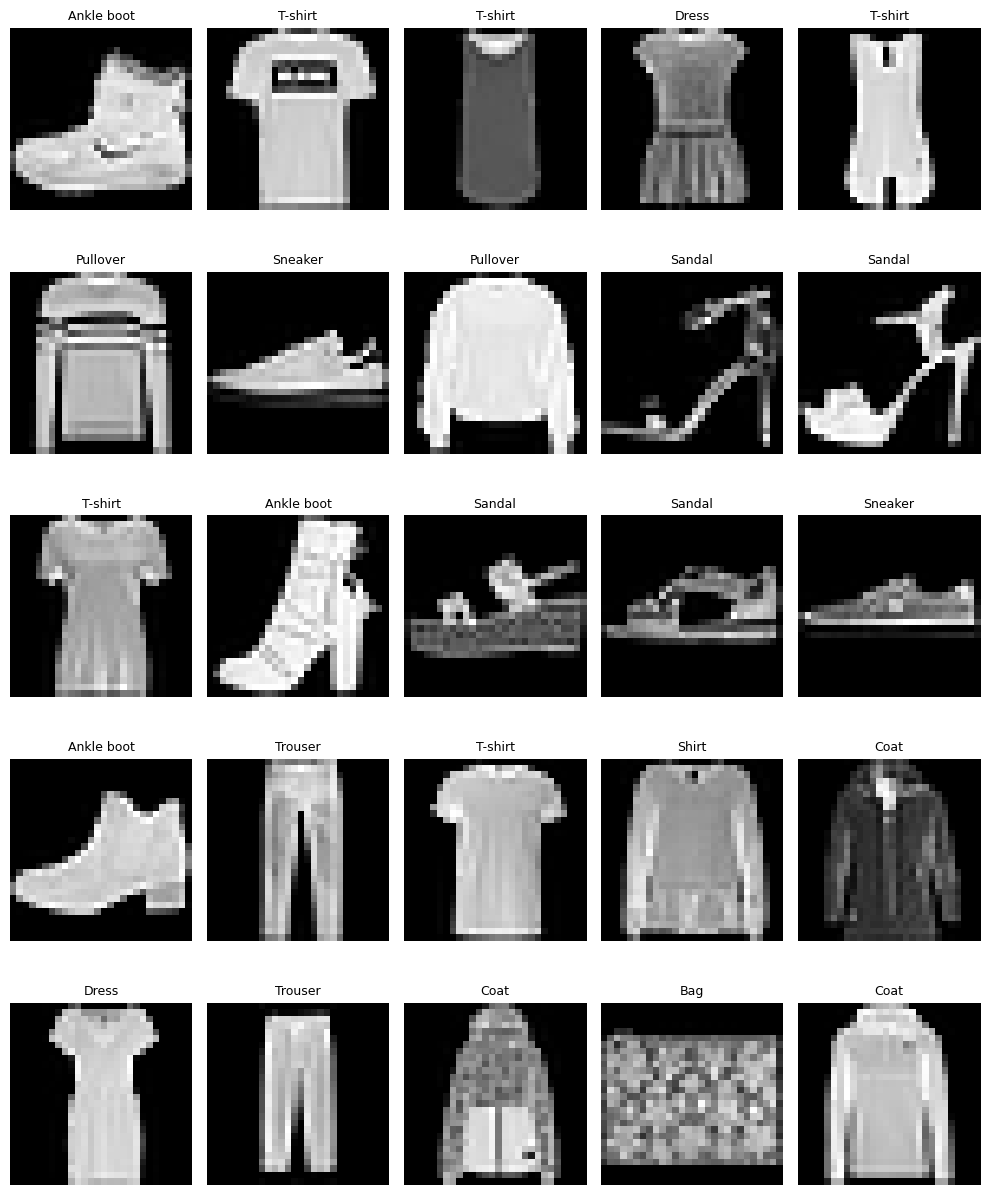

In [6]:
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [8]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),

        layers.Dense(10, activation='softmax')
    ])
    return model

In [9]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [11]:
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 9s - 23ms/step - accuracy: 0.7820 - loss: 0.6377 - val_accuracy: 0.8426 - val_loss: 0.4264
Epoch 2/20
375/375 - 6s - 15ms/step - accuracy: 0.8408 - loss: 0.4459 - val_accuracy: 0.8646 - val_loss: 0.3732
Epoch 3/20
375/375 - 6s - 15ms/step - accuracy: 0.8546 - loss: 0.4119 - val_accuracy: 0.8496 - val_loss: 0.4007
Epoch 4/20
375/375 - 6s - 15ms/step - accuracy: 0.8642 - loss: 0.3757 - val_accuracy: 0.8615 - val_loss: 0.3718
Epoch 5/20
375/375 - 6s - 15ms/step - accuracy: 0.8709 - loss: 0.3602 - val_accuracy: 0.8743 - val_loss: 0.3413
Epoch 6/20
375/375 - 6s - 15ms/step - accuracy: 0.8769 - loss: 0.3409 - val_accuracy: 0.8753 - val_loss: 0.3398
Epoch 7/20
375/375 - 6s - 16ms/step - accuracy: 0.8799 - loss: 0.3329 - val_accuracy: 0.8780 - val_loss: 0.3379
Epoch 8/20
375/375 - 6s - 16ms/step - accuracy: 0.8824 - loss: 0.3215 - val_accuracy: 0.8783 - val_loss: 0.3283
Epoch 9/20
375/375 - 5s - 15ms/step - accuracy: 0.8877 - loss: 0.3114 - val_accuracy: 0.8840 - val_loss:

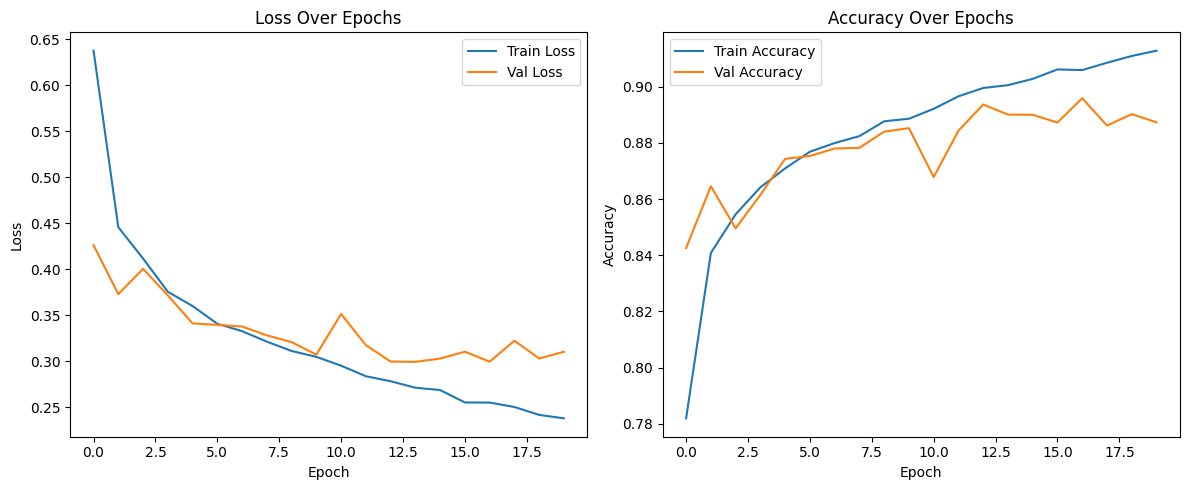

In [12]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8794


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


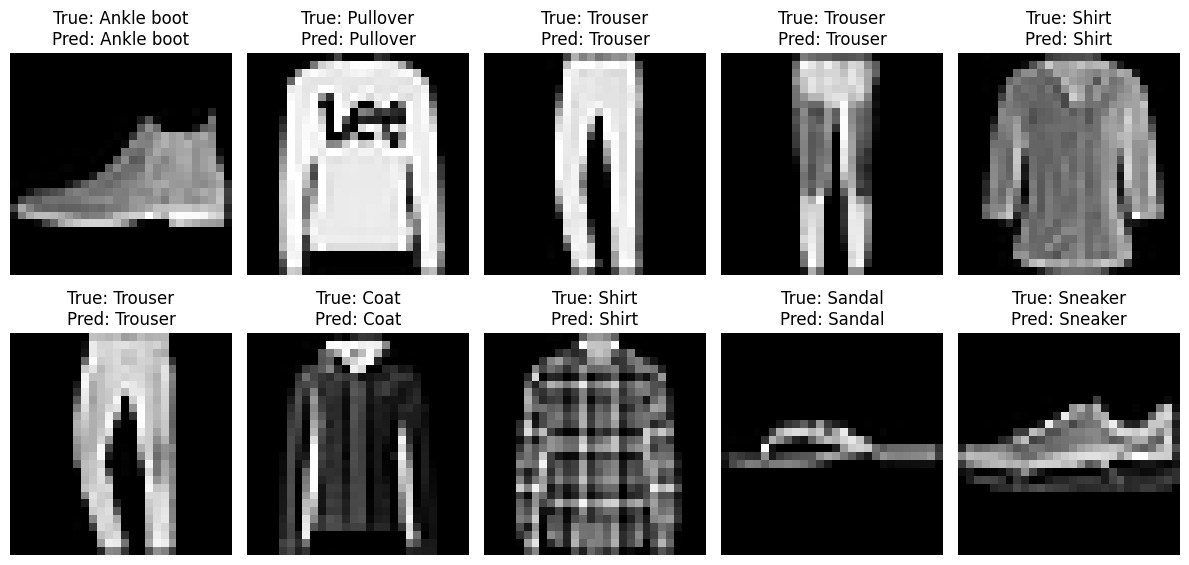

In [14]:
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset

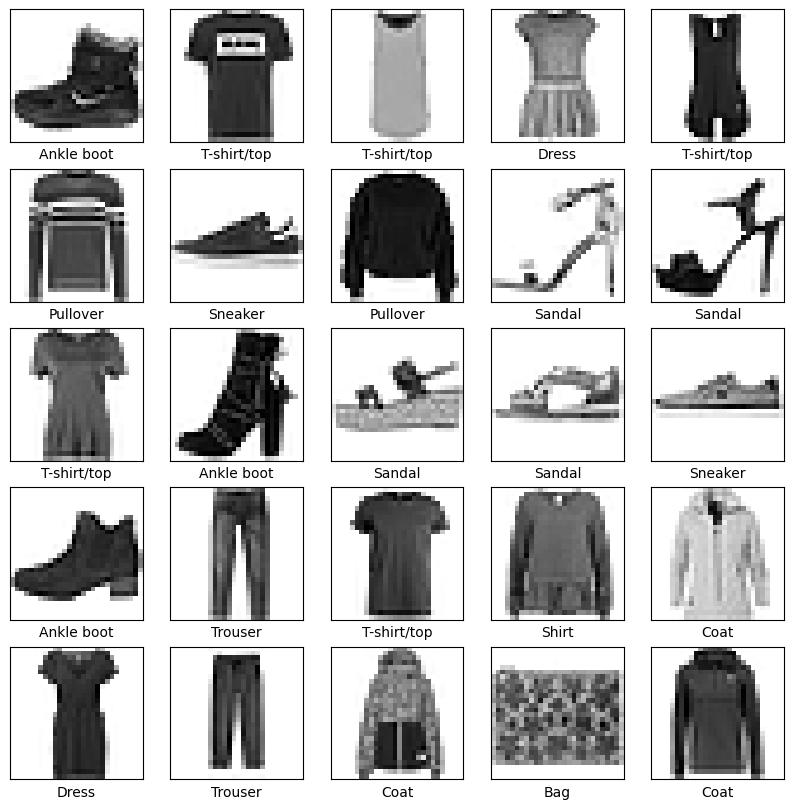

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, Activation, BatchNormalization, Dropout, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train_flat = x_train.reshape(-1,784).astype('float32') / 255.0
x_test_flat = x_test.reshape(-1,784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [16]:
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

def create_resnet_dnn():
    inputs = Input(shape=(784,))
    x = GaussianNoise(0.05)(inputs)
    x=Dropout(0.2)(x)
    x = Dense(512, kernel_regularizer=l2(5e-4))(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dropout(0.6)(x)

    x1 = Dense(512, kernel_regularizer=l2(5e-4))(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('swish')(x1)
    x1 = Dropout(0.6)(x1)

    x2 = Dense(512, kernel_regularizer=l2(5e-4))(x1)
    x2 = BatchNormalization()(x2)
    res1 = Add()([x, x2])
    res1 = Activation('swish')(res1)

    x3 = Dense(256, kernel_regularizer=l2(5e-4))(res1)
    x3 = BatchNormalization()(x3)
    x3 = Activation('swish')(x3)
    x3 = Dropout(0.5)(x3)

    x4 = Dense(256, kernel_regularizer=l2(5e-4))(x3)
    x4 = BatchNormalization()(x4)
    res1_down = Dense(256, kernel_regularizer=l2(5e-4))(res1)
    res1_down = BatchNormalization()(res1_down)
    res2 = Add()([res1_down, x4])
    res2 = Activation('swish')(res2)

    x_final = Dense(128, kernel_regularizer=l2(5e-4))(res2)
    x_final = BatchNormalization()(x_final)
    x_final = Activation('swish')(x_final)
    x_final = Dropout(0.4)(x_final)

    outputs = Dense(10, activation='softmax')(x_final)
    return Model(inputs, outputs)

In [17]:
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()
optimizer = Adam(learning_rate=0.0002, weight_decay=1e-4)

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),metrics=['accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)]

In [18]:
dnn_history = dnn_model.fit(x_train_flat, y_train, 
                            epochs=10, 
                            batch_size=128, 
                            validation_split=0.2,
                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train, 
                                 epochs=175, 
                                 batch_size=128, 
                                 validation_data=(x_test_flat, y_test),
                                 callbacks=callbacks,
                                 verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7440 - loss: 0.7463 - val_accuracy: 0.8554 - val_loss: 0.4110
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8597 - loss: 0.3886 - val_accuracy: 0.8603 - val_loss: 0.3762
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8739 - loss: 0.3471 - val_accuracy: 0.8744 - val_loss: 0.3448
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8832 - loss: 0.3145 - val_accuracy: 0.8633 - val_loss: 0.3700
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8887 - loss: 0.2972 - val_accuracy: 0.8792 - val_loss: 0.3284
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8965 - loss: 0.2780 - val_accuracy: 0.8884 - val_loss: 0.3072
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9027 - loss: 0.2613 - val_accuracy: 0.8856 - val_loss: 0.3173
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9051 - loss: 0.2519 - val_accur

In [19]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

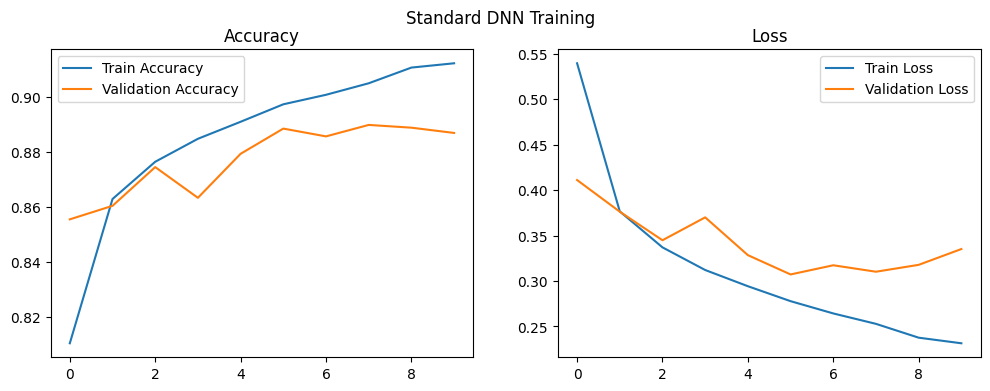

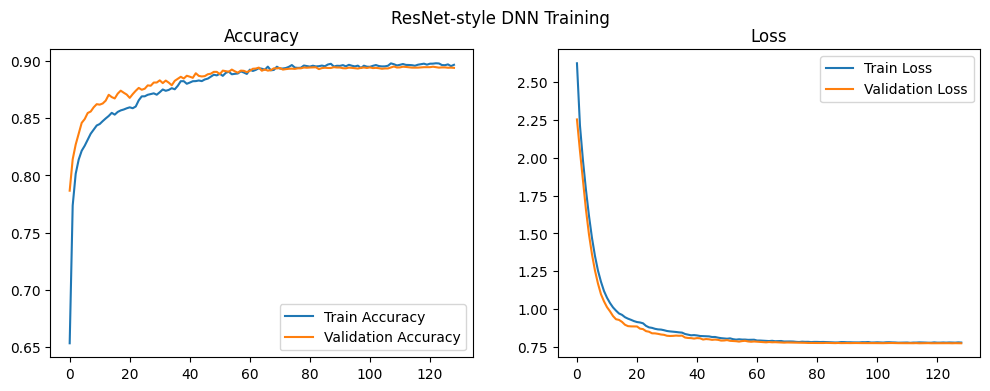

In [20]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [21]:
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [22]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8800
ResNet-style DNN Test Accuracy: 0.8950



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


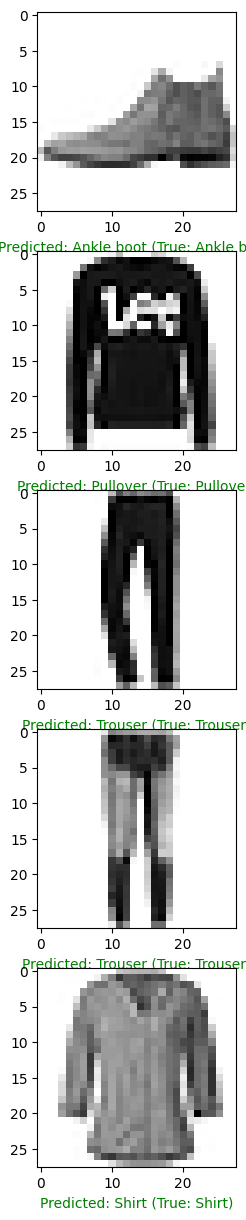


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


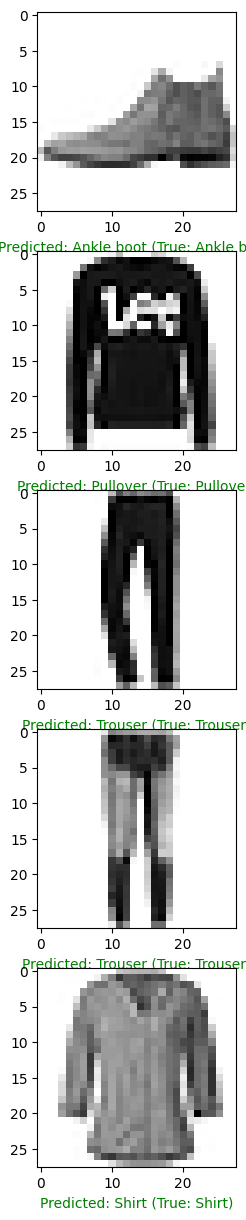

In [23]:
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)